# Multiple Linear Regression - (Assumptions Checking)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data
df = pd.read_csv('auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
print("Missing Values")
np.round((df.isna().sum()/df.shape[0])*100,2)

Missing Values


mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
model year      0.0
origin          0.0
car name        0.0
dtype: float64

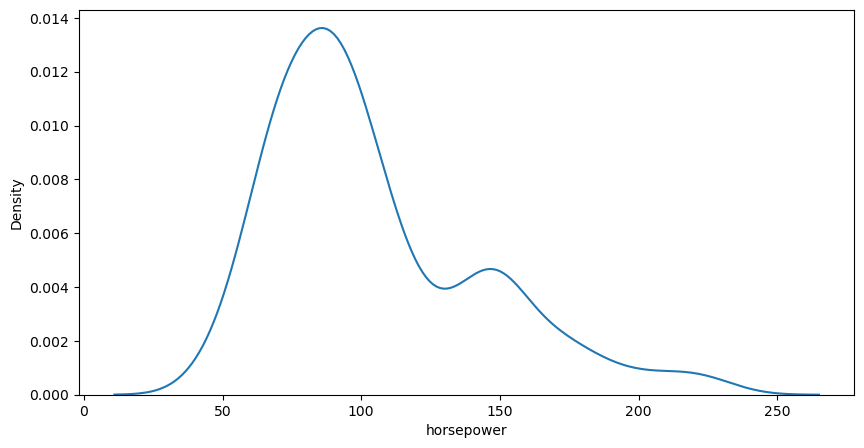

In [5]:
# Replacing '?' with None
df.replace('?',None,inplace = True)

# Datatype conversion for horsepower
df['horsepower'] = df['horsepower'].astype('float64')

# Checking for 'horsepower' distribution
plt.figure(figsize = (10,5))
sns.kdeplot(df['horsepower'])
plt.show()

# Replacing missing values in horsepower with 'Median' as the variable 'horsepower' is right skewed
df['horsepower'].fillna(df['horsepower'].median(),inplace = True)

In [6]:
x = df.drop(['mpg','car name'], axis = 1)
y = df['mpg']

In [7]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.3, random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 1)

In [8]:
print("Train Set")
print("X Train",x_train.shape)
print("Y Train",y_train.shape)
print()
print("Validation Set")
print("X Validation Set",x_val.shape)
print("Y Validation Set",y_val.shape)
print()
print("Test Set")
print("X Test Set",x_test.shape)
print("Y Test Set",y_test.shape)

Train Set
X Train (278, 7)
Y Train (278,)

Validation Set
X Validation Set (60, 7)
Y Validation Set (60,)

Test Set
X Test Set (60, 7)
Y Test Set (60,)


In [9]:
xc = sm.add_constant(x_train)
lr_model  = sm.OLS(y_train,xc)
result  = lr_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     162.5
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           6.02e-93
Time:                        00:08:14   Log-Likelihood:                -738.57
No. Observations:                 278   AIC:                             1493.
Df Residuals:                     270   BIC:                             1522.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.7456      5.655     -3.315      0.001     -29.879      -7.612
cylinders       -0.3934      0.429     -0.917      0.360      -1.238       0.452
displacement     0.0228      0.010      2.281      0.023       0.003       0.043
horsepower      -0.0199      0.017     -1.199      0.231      -0.052       0.013
weight          -0.0070      0.001     -8.308      0.000      -0.009      -0.005
acceleration     0.0612      0.120      0.511      0.610      -0.175       0.297
model year       0.7925      0.063     12.644      0.000       0.669       0.916
origin           1.1989      0.347      3.459      0.001       0.516       1.881
==============================================================================
Omnibus:                       20.094   Durbin-Watson:                   2.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.104
Skew:                           0.495   Prob(JB):                     4.79e-07
Kurtosis:                       4.238   Cond. No.                     8.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1. Linear Relationship

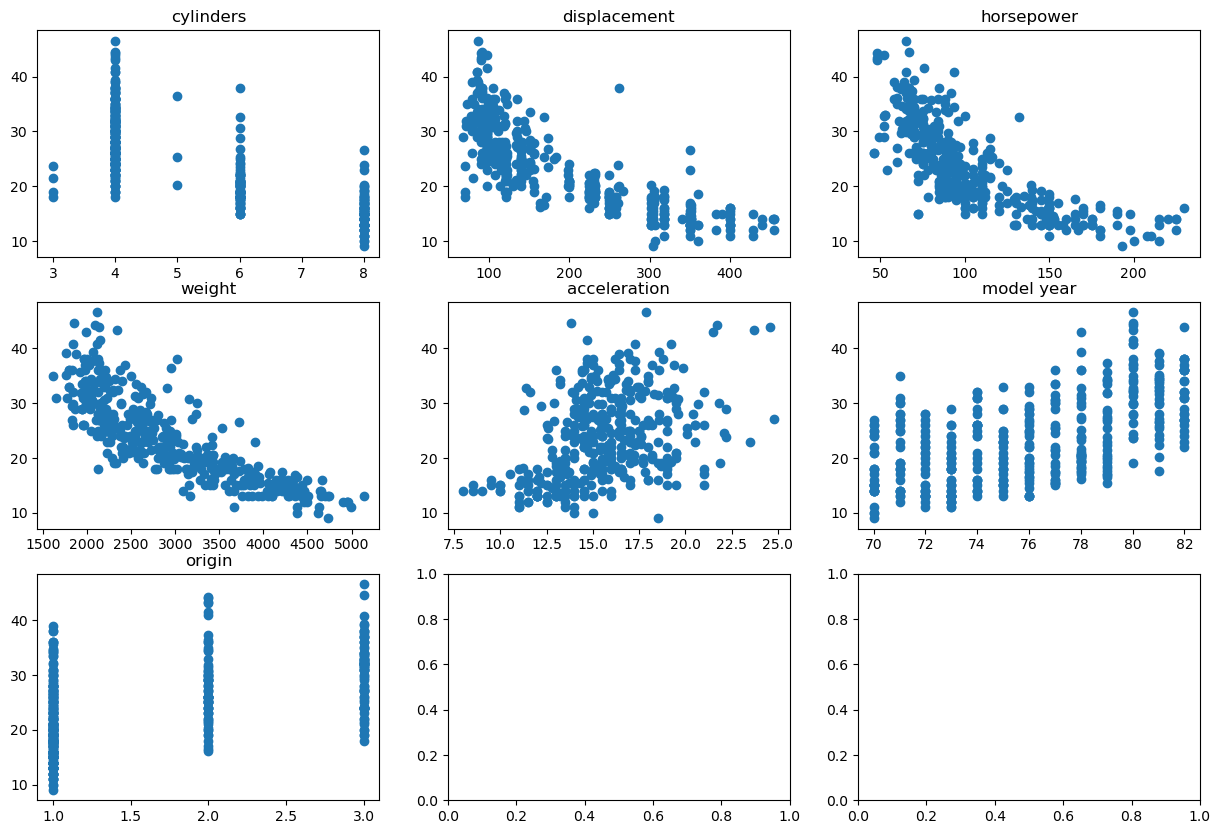

In [10]:
plt.rcParams["figure.figsize"] = (15,10)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7)) = plt.subplots(3, 3)
ax1.scatter(x['cylinders'],y)
ax1.set_title('cylinders')

ax2.scatter(x['displacement'],y)
ax2.set_title('displacement')

ax3.scatter(x['horsepower'],y)
ax3.set_title('horsepower')

ax4.scatter(x['weight'],y)
ax4.set_title('weight')

ax5.scatter(x['acceleration'],y)
ax5.set_title('acceleration')

ax6.scatter(x['model year'],y)
ax6.set_title('model year')

ax7 = fig.get_axes()[6] # Access the 7th subplot (index starts from 0)
ax7.scatter(x['origin'],y)
ax7.set_title('origin')
plt.show()

#### If we don't get a linear relationship, we can transform the variable so that we get near to linear relationship with the target variable.

### 2. No or Little Multicollinearity

> Multicollinearity tells us the correlation between independent variables. This needs to be low or null to build a unbiased linear regression model.

> Diagnose by taking a look at the correlation among independent variables and evaluate VIF(i.e. Variance Inflation Factor).

> Variance Inflation Factor measures how much multicollinearity affects the variance of a regression coefficient.

> VIF score of an independentvariable determines how well the variable is explained by other independent variables.

> VIF = 1/(1-R^2)

> In a general sense, VIF = 1 depicts no correlation between the independent and other variables.

> VIF exceeding 5 or 10 indicates high multicollinearity between independent variables.

> Solution: Remove statistically redundant variables.

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
vif_df = pd.DataFrame(columns = ['Variable','VIF'])
for i in range(1,x.shape[1]):
    var_nm = x.columns[i]
    vif_val = variance_inflation_factor(x.values,i)
    temp_df = pd.DataFrame([[var_nm,vif_val]],columns = ['Variable','VIF'])
    vif_df = pd.concat([vif_df,temp_df])
    
vif_df.reset_index(drop = True, inplace = True)
vif_df

,Variable,VIF
0,displacement,96.948103
1,horsepower,64.739157
2,weight,136.868232
3,acceleration,68.217321
4,model year,115.627230
5,origin,8.350741


From the above table we can ideate that majority of the variables have high multicollinearity and thus needs to be treated by way of penalizing or dimensionality reduction.

<Axes: >

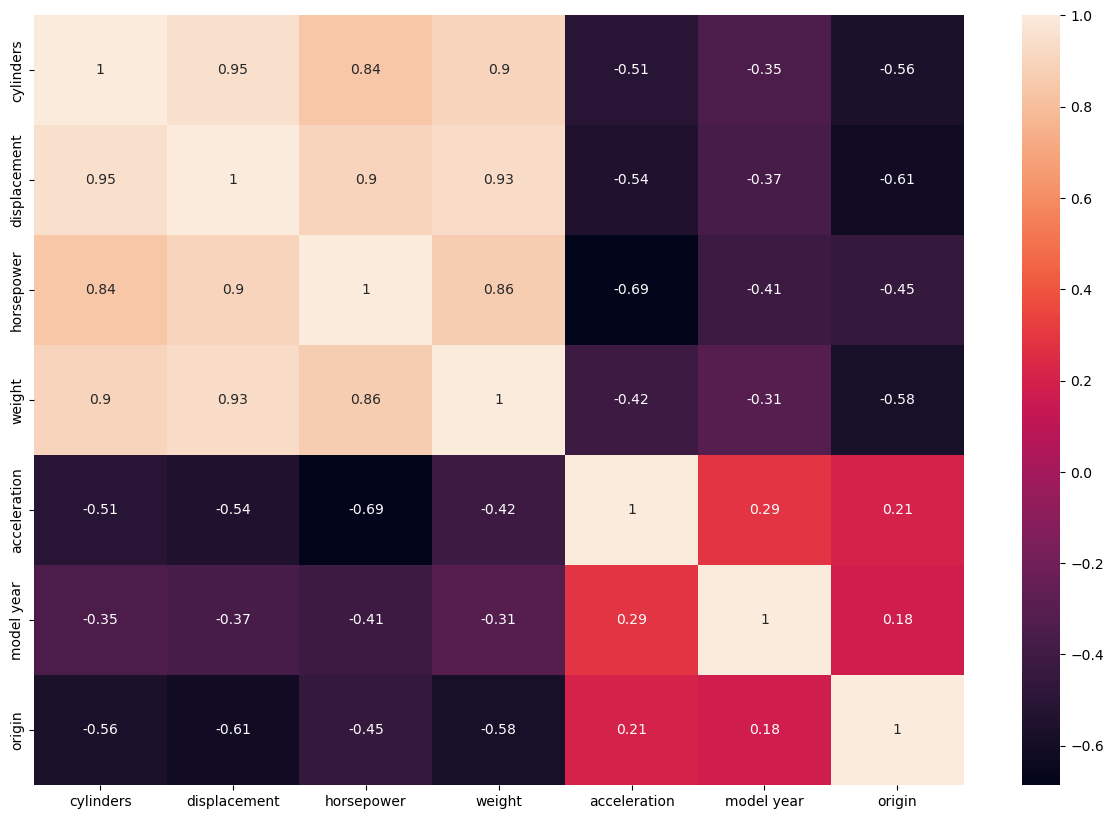

In [13]:
sns.heatmap(x.corr(), annot = True)

### 3. Homoscedasticity - Constant Variance

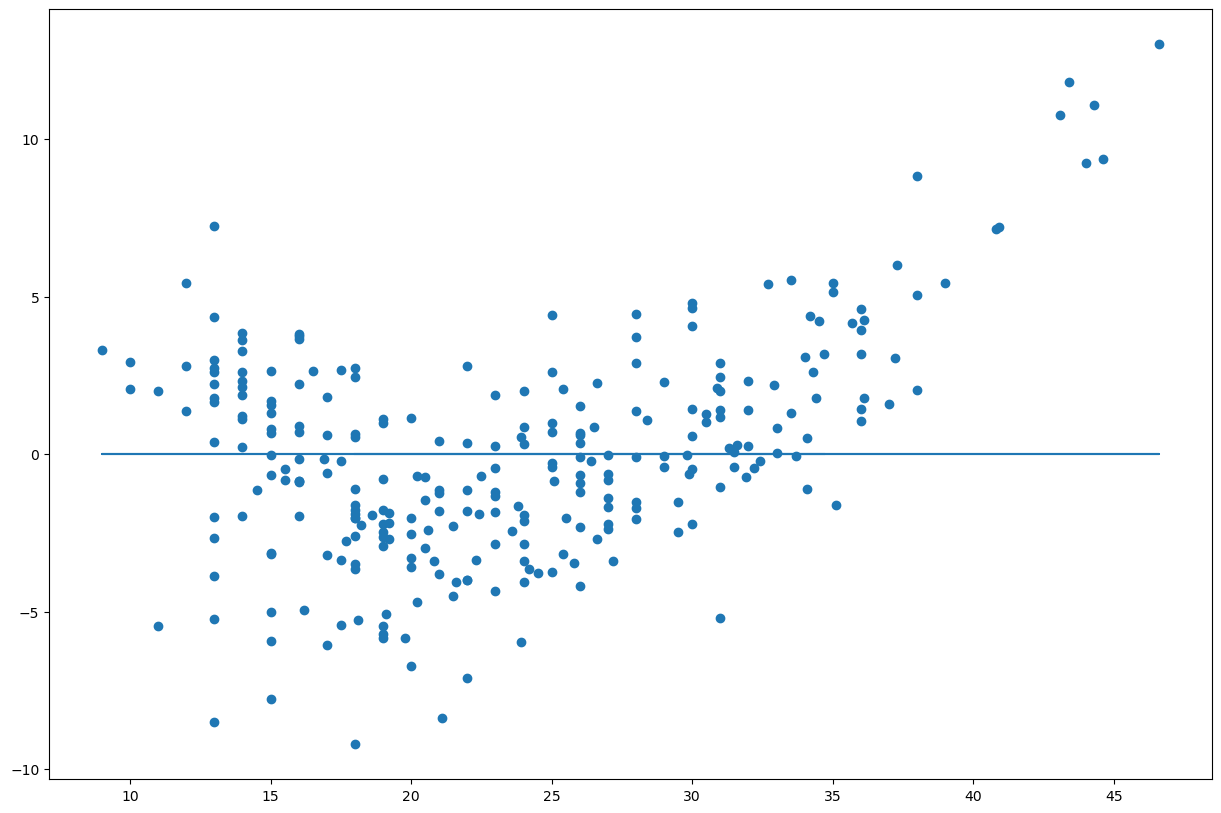

In [14]:
residual = result.resid
plt.scatter(y_train, residual)
plt.plot(y_train, [0]*len(y_train))

## Here, I have taken training data to check this assumption due to shape mismatch between 'y' and 'residual'(fit on train data), 
## but complete x and y data can be used in all scenarios provided the same number of records exist among both 

Homoscedasticity tells that the spread of residuals is consistent across all the independent variables. In a nutshell, "nosie" or randomness in the data is same everywhere.

> Goldfeld test is used to identidy homoscedasticity

The test is based on the below hypothesis:
* Null Hypothesis: Variance is constant across the range of data.
* Alternate Hypothesis: Variance is NOT constant across the range of data. 

Solution:
* Transform the independent features (Caution: May create non-linearity in the model).
* Weighted least squares regression helps assign different weights to observations based on their variance.

### 4. No Autocorrelation between residuals of serially independent variables

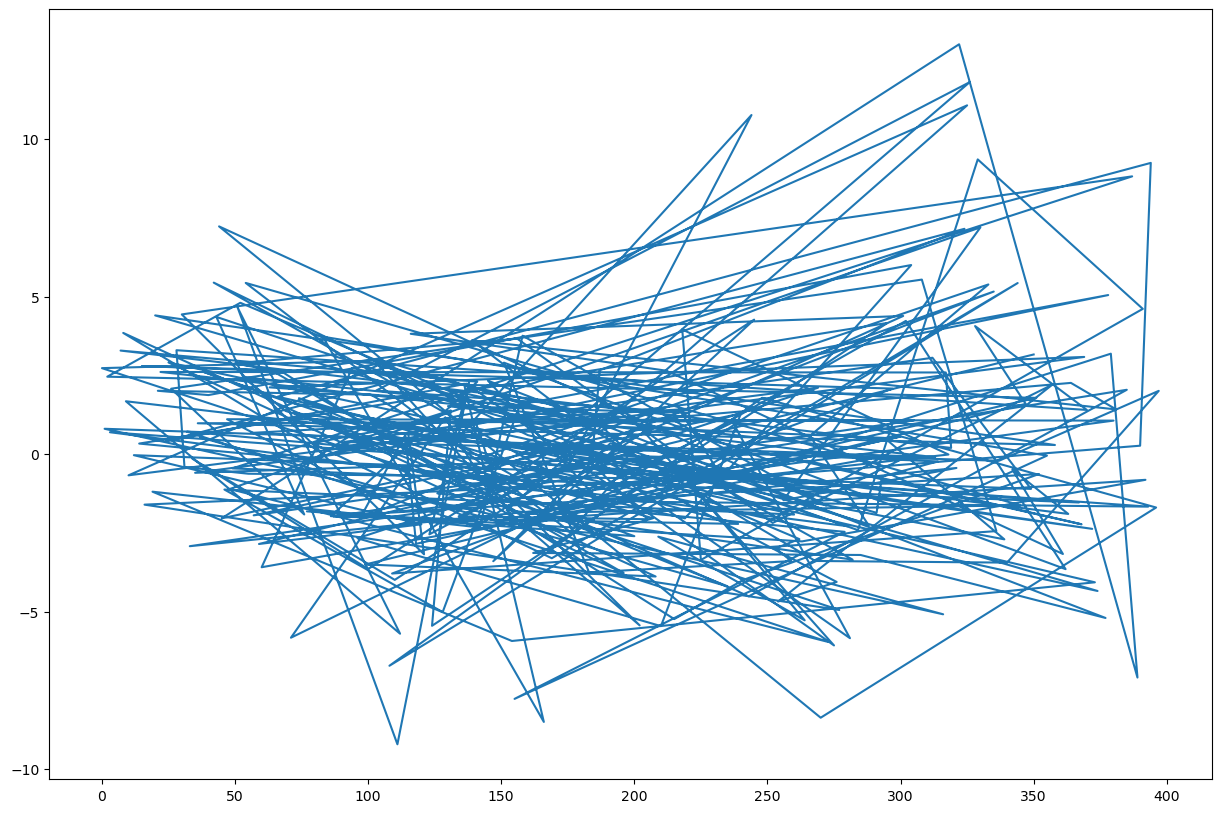

In [15]:
plt.plot(residual.index, residual)

If there is a pattern found in the chart plotted above, then we infer that there exist correlation between the residuals.

This can be tested using Durbin Watson Statistical test.
* It's value range from 0-4. If the value of Durbin Watson is between 0-2 it's known as positive correlation.
* If the value ranges from 2-4, it is known as negative autocorrelation.
* If the value is exactly 2, it means no autocorrelation.

Solution:
* Check for correlation between residuals and another variable that is not in the model. 

### 5. Residuals are normally distributed

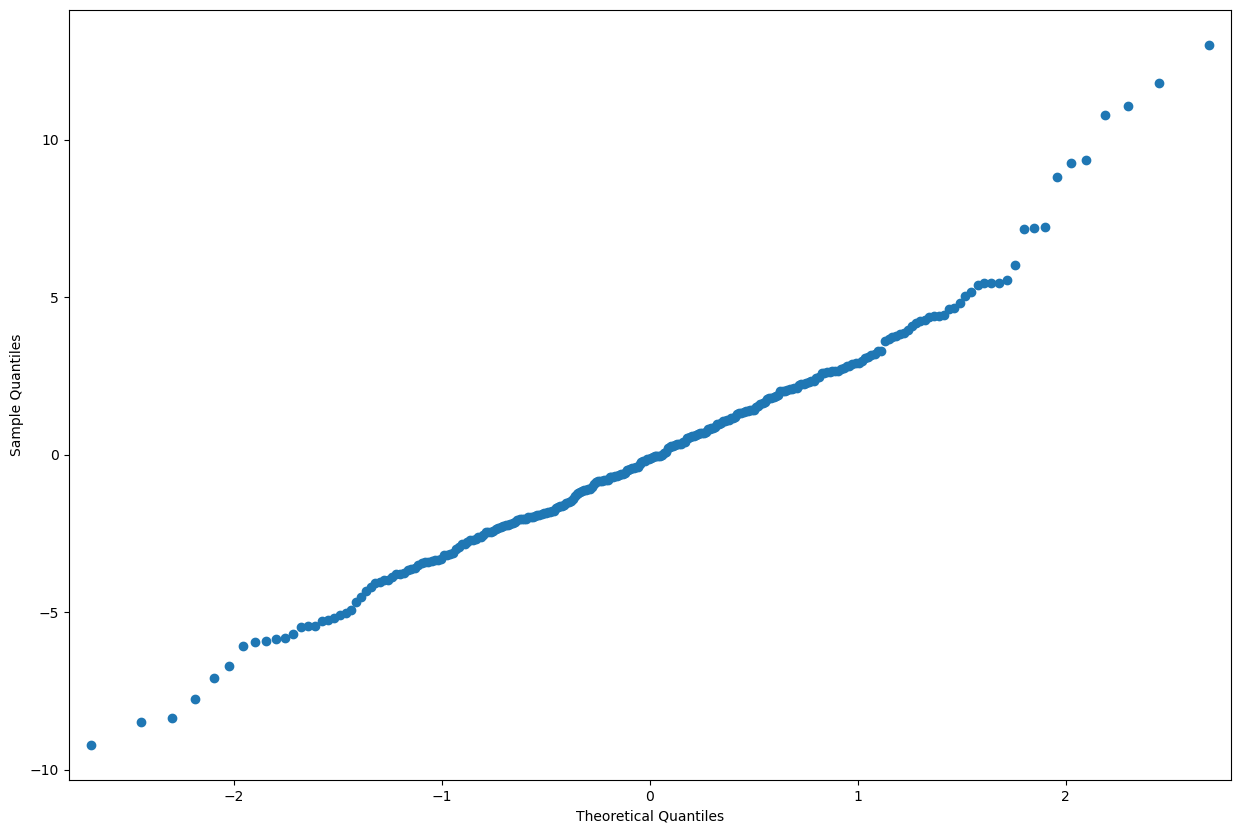

In [16]:
sm.qqplot(residual)
plt.show()

<Axes: ylabel='Density'>

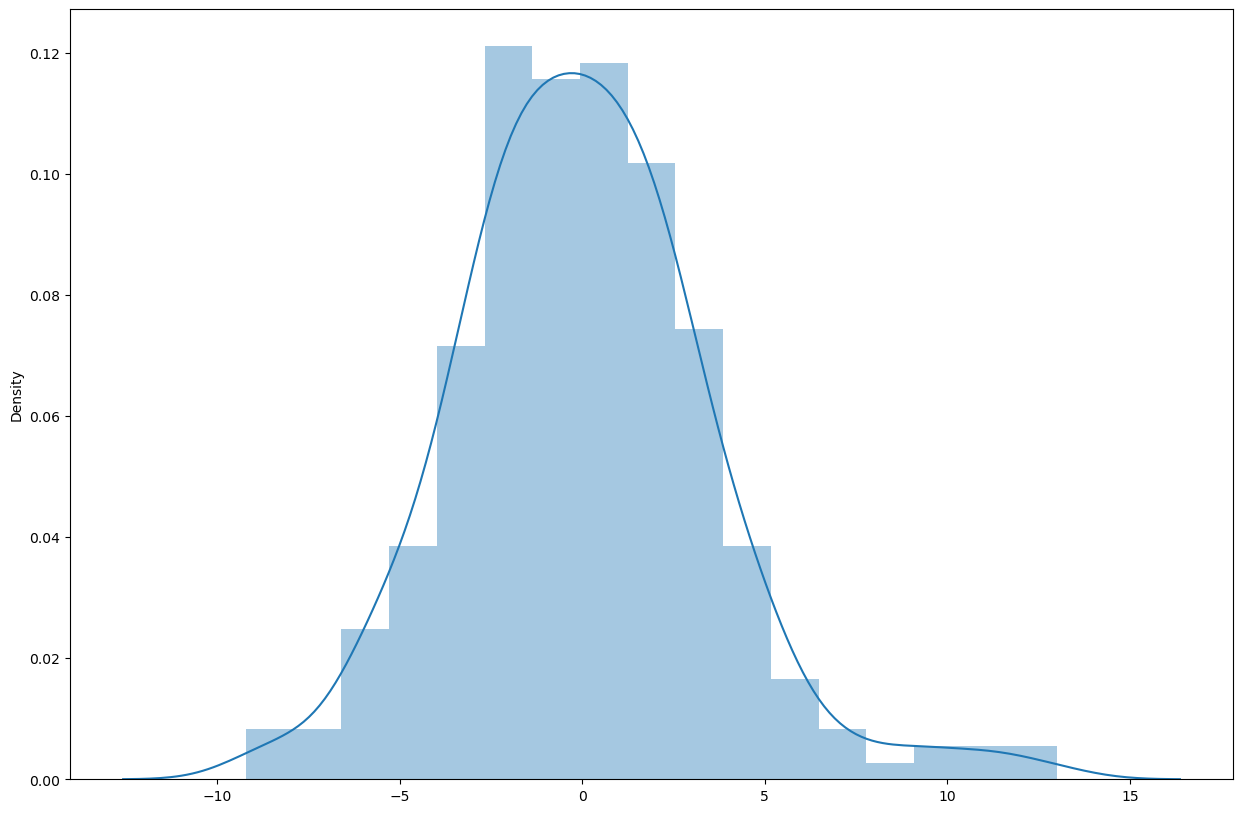

In [17]:
sns.distplot(residual)

From the above plots, we can infer the residuals are normally distributed thus satisfying the assumption.

Jarque-Bera test can be used to check if the residuals are normally distributed
* Null Hypothesis: Residuals are normally distributed.
* Alternate Hypothesis: Residuals are NOT normally distributed.

Solution:
* Transform the independent features (Caution: May create non-linearity in the model).
* Check for any important feature missing.

### 6. No Endogeneity

This assumption checks if there is relationship between errors and independent variables.

Ideally, residual plot will show no pattern. The plotted line should be approximately horizontal at zero.

The presence of pattern may indicate a problem with some aspect of the linear model.

Rainbow test is useful here to check this assumption. The basic idea of this test is that even if the true relationship is non-linear a goo-linear ft can be achieved on a subsample in the "middle" of the data.

The null hypothesis is rejected whenever the overall fit is significantly worse that the fit for sub-sample.
* Null Hypothesis: Fit of Model using Full Sample = Fit of Model using Central Subset (Linear Relationship)
* Alternate Hypothesis: Fit of Model using Full Sample is worse compared to fit of Model using central subset.

### 7. No relationship between Residuals and Independent variables 

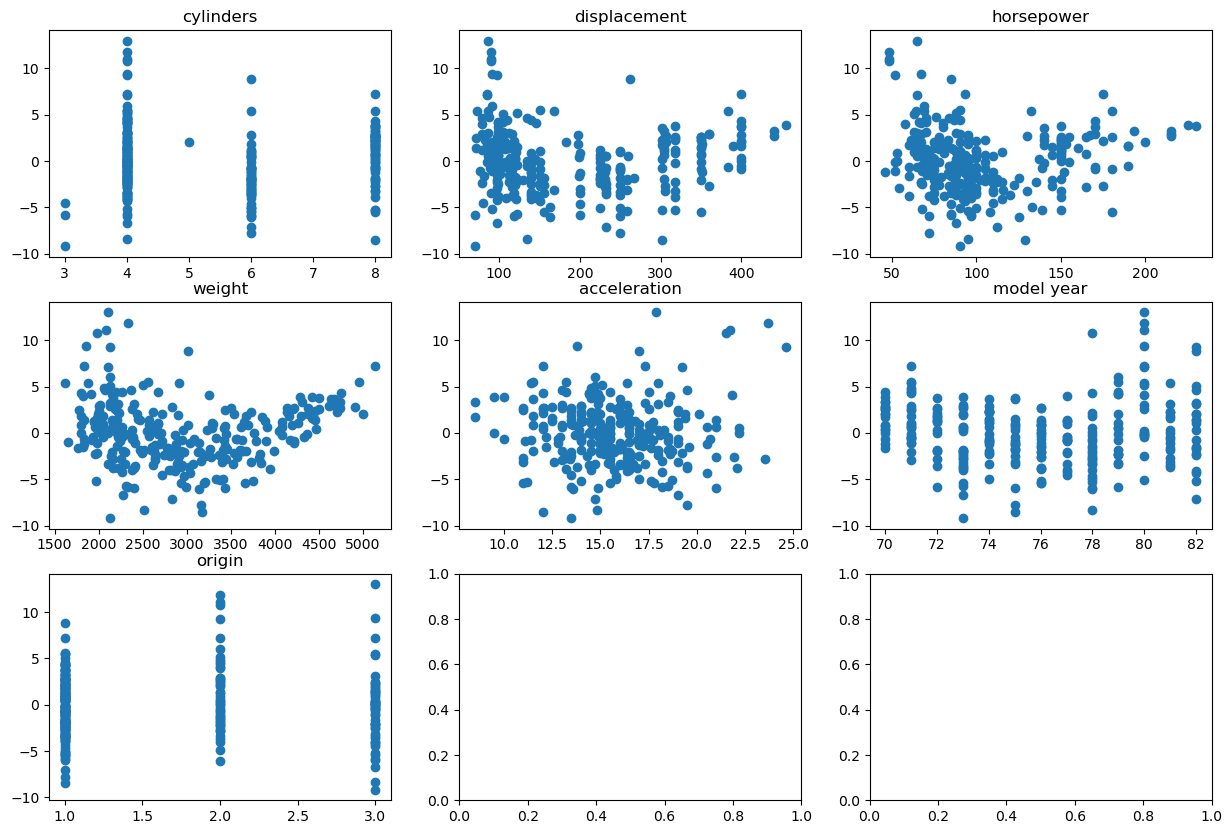

In [18]:
plt.rcParams["figure.figsize"] = (15,10)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7)) = plt.subplots(3, 3)
ax1.scatter(x_train['cylinders'],residual)
ax1.set_title('cylinders')

ax2.scatter(x_train['displacement'],residual)
ax2.set_title('displacement')

ax3.scatter(x_train['horsepower'],residual)
ax3.set_title('horsepower')

ax4.scatter(x_train['weight'],residual)
ax4.set_title('weight')

ax5.scatter(x_train['acceleration'],residual)
ax5.set_title('acceleration')

ax6.scatter(x_train['model year'],residual)
ax6.set_title('model year')

ax7 = fig.get_axes()[6] # Access the 7th subplot (index starts from 0)
ax7.scatter(x_train['origin'],residual)
ax7.set_title('origin')
plt.show()

Residuals basically are the portion of dependent variable's variation that is not explained by the independent variable. And, if we have residuals correlated with independent variable, it indicates our model has missed a significant relationship or data pattern that needs to be looked upon.